In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio

In [50]:
import os
os.chdir(r'C:\Users\jacob\OneDrive - University of Louisville\Projects\Dissertation\PhaseI\data_analysis\TRANSONIC\TRANSONIC')
from src.models import LFR_DZ_CSTR
from src.modules.system_class import System

In [51]:
quants = pd.read_csv("results/run1/results/eval_outputs.csv", index_col=0, 
                     header=0)
DOE = pd.read_csv("data/CASE_PARAMETERS_MODEL.csv", index_col=0, header=0)

quants_and_DOE = DOE.merge(quants, on='CASE_NUM')

# Boxplot for Relative Absolute Error of Model Arteries

In [52]:
fig = px.box(quants, x="RAE_C", points='all', width=900, height=400,
             labels={"RAE_C": "Relative Absolute Error"}, 
             notched=True)

fig.update_layout(
    paper_bgcolor='white',  # Clean white background
    plot_bgcolor='white',  # White plot background to avoid distractions
    title_font=dict(size=16, color='black', family='Arial'),  # Professional font settings
    xaxis_title_text='Relative Absolute Error',  # Clear and concise axis title
    xaxis=dict(
        title_standoff=10,
        tickfont=dict(family='Arial', size=18),
        title_font=dict(family='Arial', size=22)
    ),
)

pio.write_image(fig, 'results/run1/results/RAE_boxplot.png', 
                format='png', width=1080, height=720)
fig.show()


# Visual Comparison of Mathematical Model vs. CFD Data

In [59]:
arteries_of_interest = quants_and_DOE[
    (quants_and_DOE['FLOW_RATE'].isin([1, 2.5, 4]))
    & (quants_and_DOE['RAMP_ANGLE'] == 45)
]
print(arteries_of_interest.index)
wd = r'C:\Users\jacob\OneDrive - University of Louisville\Projects\Dissertation\PhaseI\data_analysis\TRANSONIC\TRANSONIC\results\run1'
wd = os.path.normpath(wd)

for ID, features in arteries_of_interest.iterrows():
    artery = System(ID, wd)
    # Get CFD E_theta curve
    # Get model E_theta curve
    # Plot both curves on the appropriate subplot 
    pass

Index([16, 22, 28, 151, 157, 163, 241, 247, 253], dtype='int64', name='CASE_NUM')


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\jacob\\OneDrive - University of Louisville\\Projects\\Dissertation\\PhaseI\\data_analysis\\TRANSONIC\\TRANSONIC\\results\\run1/C_curves\\sim241.csv'

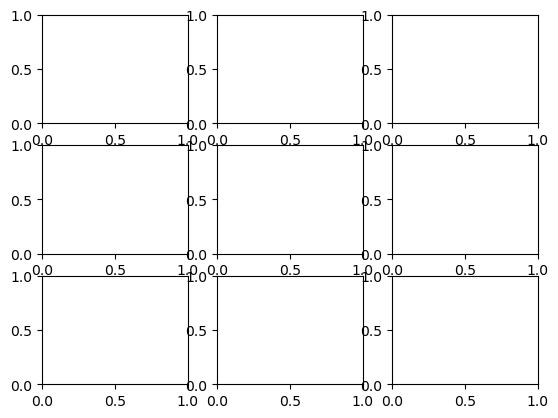

In [27]:
fig, axs = plt.subplots(3, 3)